<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Lab Sheet : Digital Image Processing</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Project 3 :  Detecting Edges in Digital Image</h2>
</div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Question 1 : Apply Sobel operator on IMG, and show the horizontal, vertical and the final edge  </h3>
</div>

<div><h4>Main</h4></div>

In [8]:
IMG = cv2.imread("image with smooth background.jpg",cv2.IMREAD_UNCHANGED)

# ********** crop the image to make it square image **********************
h, w = IMG.shape[:2]
# The final square size
d = min(h, w)
# Compute cropping start points
start_y = (h - d) // 2
start_x = (w - d) // 2
# Crop using array slicing (OpenCV doesn't need a special function)
IMG_square = IMG[start_y:start_y + d, start_x:start_x + d]
# ********************************

In [9]:
IMG_graylevel = cv2.imread("graylevel_IMG.jpg")
IMG_graylevel = cv2.cvtColor(IMG_square, cv2.COLOR_BGR2GRAY)

In [94]:
IMG_horizontal_edge, IMG_vertical_edge, IMG_final_edge = apply_sobel_operator(IMG_graylevel)

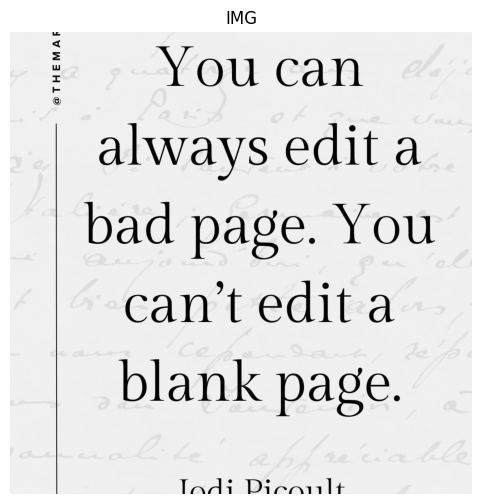

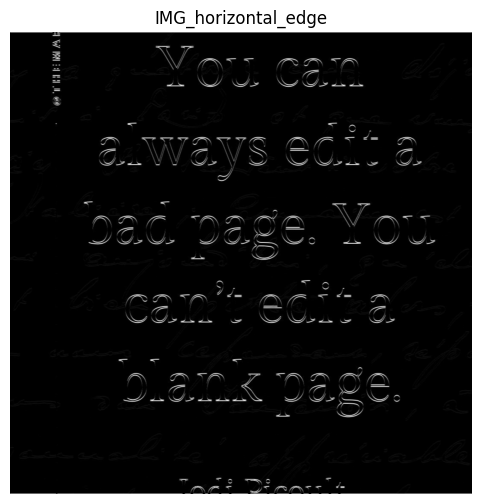

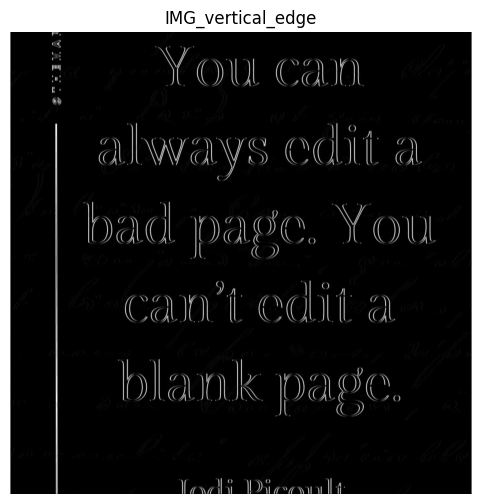

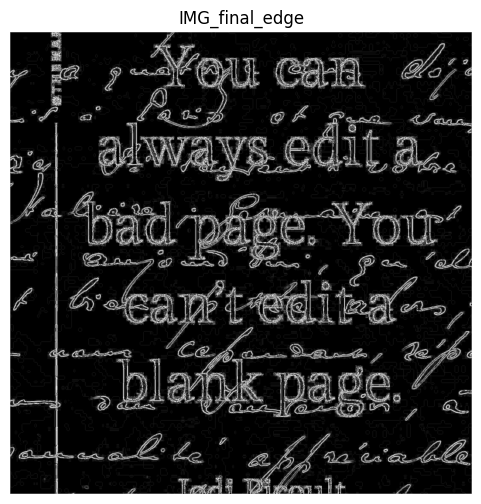

In [95]:
plt.figure(figsize=(6,6))
plt.imshow(IMG_graylevel, cmap = "gray")
plt.axis('off')
plt.title("IMG")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(IMG_horizontal_edge, cmap = "gray")
plt.axis('off')
plt.title("IMG_horizontal_edge")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(IMG_vertical_edge, cmap = "gray")
plt.axis('off')
plt.title("IMG_vertical_edge")
plt.show()
plt.figure(figsize=(6,6))
plt.imshow(IMG_final_edge, cmap = "gray")
plt.axis('off')
plt.title("IMG_final_edge")
plt.show()

<div><h4>Functions</h4></div>

In [3]:
def apply_sobel_operator(IMG):
    X_kernal = generate_sobel_kernal(axis_type = 'X')
    Y_kernal = generate_sobel_kernal(axis_type = 'Y')
    
    IMG_horizontal_edge = do_Convolution(IMG, X_kernal, False)
    IMG_vertical_edge = do_Convolution(IMG, Y_kernal, False)
    IMG_final_edge = compute_gradient_magnitude_of_IMG (IMG_horizontal_edge, IMG_vertical_edge)
    
    return IMG_horizontal_edge, IMG_vertical_edge, IMG_final_edge
    
def compute_gradient_magnitude_of_IMG (IMG___axis_X__gradien, IMG___axis_Y__gradien) :
    gradient_magnitude_of_IMG = np.sqrt(np.pow(IMG___axis_X__gradien,2) + np.pow(IMG___axis_Y__gradien,2))
    
    # for normalisation we do:
    if gradient_magnitude_of_IMG.max() - gradient_magnitude_of_IMG.min() != 0:
        gradient_magnitude_of_IMG = 255 * ( (gradient_magnitude_of_IMG - gradient_magnitude_of_IMG.min()) / (gradient_magnitude_of_IMG.max() - gradient_magnitude_of_IMG.min()) )
    
    return gradient_magnitude_of_IMG.astype(np.uint8)
    
def generate_sobel_kernal(axis_type = ''):
    kernal = np.array([0])
    if axis_type == 'X':
        kernal = np.array([[-1,-2,-1],
                           [0,0,0],
                           [1,2,1]
                          ])
    elif axis_type == 'Y':
        kernal = np.array([[-1,0,1],
                           [-2,0,2],
                           [-1,0,1]
                          ])
    return kernal
    
def do_Convolution(IMG, kernal, channels = True):
    Convoluted_IMG = np.zeros_like(IMG, np.int16)
    k = kernal.shape[0] // 2
    kernal_size = kernal.shape[0]
    padded = np.pad(IMG, pad_width=k, mode='constant', constant_values=0)
    if channels :
        height, width, channels = IMG.shape
        for channel in range(channels):
            for i in range(width):
                for j in range(height):
                    region = padded[j:j+kernal_size, i:i+kernal_size, channel]
                    Convoluted_IMG[j,i,channel] = np.sum(region * kernal)
    else:
        height, width = IMG.shape
        for i in range(width):
            for j in range(height):
                region = padded[j:j+kernal_size, i:i+kernal_size]
                Convoluted_IMG[j,i] = np.sum(region * kernal)
    Convoluted_IMG_after_absolut_value = np.abs(Convoluted_IMG)
    if Convoluted_IMG_after_absolut_value.max() - Convoluted_IMG_after_absolut_value.min() != 0 :
        Convoluted_IMG_after_absolut_value = 255 * ((Convoluted_IMG_after_absolut_value - Convoluted_IMG_after_absolut_value.min()) / (Convoluted_IMG_after_absolut_value.max() - Convoluted_IMG_after_absolut_value.min()))
    Convoluted_IMG_after_absolut_value = Convoluted_IMG_after_absolut_value.astype(np.uint8)
    return Convoluted_IMG_after_absolut_value


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Question 2 : Show the gradient magnitude image of IMG, and threshold it using 10,120,220, show the resulting images  </h3>
</div>

<div><h4>Main</h4></div>

In [96]:
gradient_magnitude_IMG = IMG_final_edge

gradient_magnitude_IMG_after_thresholding_10 = do_thresholding(gradient_magnitude_IMG, threshold = 10, channels = False)
gradient_magnitude_IMG_after_thresholding_120 = do_thresholding(gradient_magnitude_IMG, threshold = 120, channels = False)
gradient_magnitude_IMG_after_thresholding_220 = do_thresholding(gradient_magnitude_IMG, threshold = 220, channels = False)


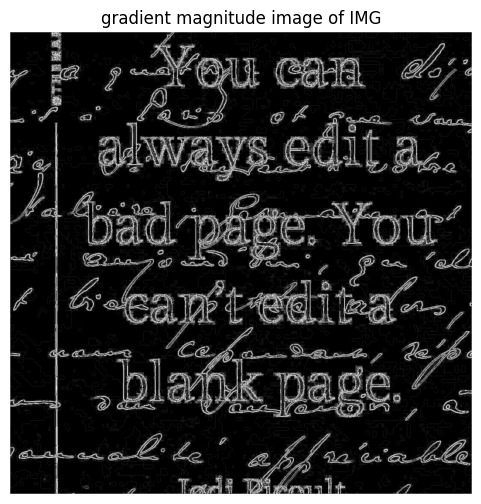

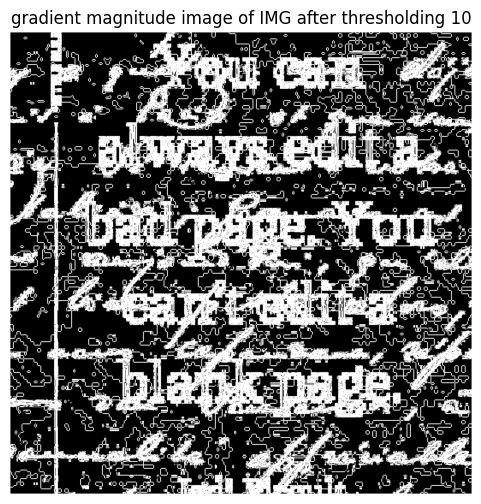

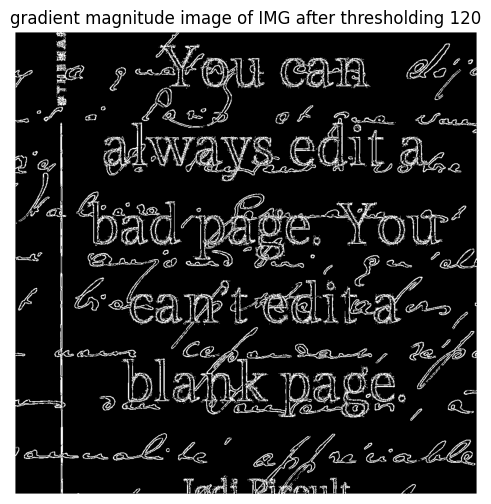

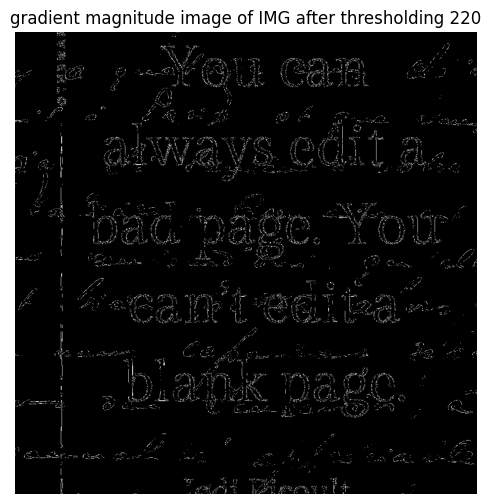

In [97]:
plt.figure(figsize=(6,6))
plt.imshow(gradient_magnitude_IMG, cmap = "gray")
plt.axis('off')
plt.title("gradient magnitude image of IMG")
plt.show()


plt.figure(figsize=(6,6))
plt.imshow(gradient_magnitude_IMG_after_thresholding_10, cmap = "gray")
plt.axis('off')
plt.title("gradient magnitude image of IMG after thresholding 10")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(gradient_magnitude_IMG_after_thresholding_120, cmap = "gray")
plt.axis('off')
plt.title("gradient magnitude image of IMG after thresholding 120")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(gradient_magnitude_IMG_after_thresholding_220, cmap = "gray")
plt.axis('off')
plt.title("gradient magnitude image of IMG after thresholding 220")
plt.show()

<div><h4>Functions</h4></div>

In [4]:
def do_thresholding(IMG_original, threshold = 120, channels = True ): # channels is for colorfull images
    IMG_after_thresholding = np.zeros_like(IMG_original, dtype=np.uint8)
    if channels :
        for channel in range(IMG_after_thresholding.shape[2]):
            for i in range(IMG_after_thresholding.shape[0]):
                for j in range(IMG_after_thresholding.shape[1]):
                    if IMG_original[i, j, channel] <= threshold:
                        IMG_after_thresholding[i, j, channel] = 0
                    else:
                        IMG_after_thresholding[i, j, channel] = 255
    else:
        for i in range(IMG_after_thresholding.shape[0]):
            for j in range(IMG_after_thresholding.shape[1]):
                if IMG_original[i, j] <= threshold:
                    IMG_after_thresholding[i, j] = 0
                else:
                    IMG_after_thresholding[i, j] = 255
    return IMG_after_thresholding

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Question 3 : Show the edge image in which you keep only the pixels with the maximum of gradient in the gradient direction  </h3>
</div>

<div><h4>Main</h4></div>

In [37]:
result_of_apply_sobel_operator = apply_sobel_operator(IMG_graylevel)
gradient_magnitude_IMG__after_Non_Maximum_Suppression = apply_Non_Maximum_Suppression(result_of_apply_sobel_operator[2],\
                                                                                      do_bining_on_gradient_direction_IMG(get_gradient_direction_IMG(result_of_apply_sobel_operator[0],\
                                                                                                                                                     result_of_apply_sobel_operator[1],\
                                                                                                                                                     False),\
                                                                                                                          22.5,\
                                                                                                                          67.5,\
                                                                                                                          112.5,\
                                                                                                                          157.5,\
                                                                                                                          False),\
                                                                                      False)

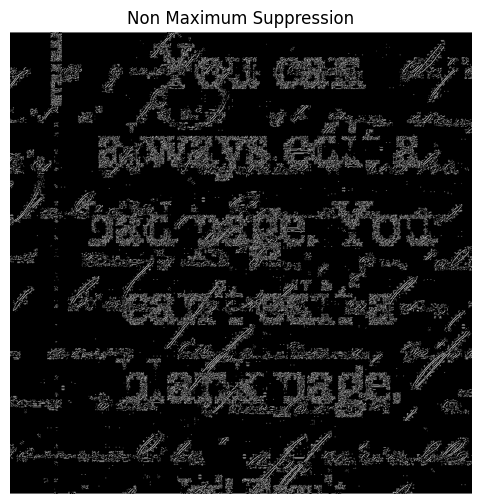

In [38]:
plt.figure(figsize=(6,6))
plt.imshow(gradient_magnitude_IMG__after_Non_Maximum_Suppression, cmap = "gray")
plt.axis('off')
plt.title("Non Maximum Suppression")
plt.show()

<div><h4>Functions</h4></div>

In [36]:
# DONE
def apply_Non_Maximum_Suppression(gradient_magnitude_IMG, gradient_direction_IMG_after_bining, channels = True):
    gradient_magnitude_IMG__after_Non_Maximum_Suppression = np.zeros_like(gradient_magnitude_IMG)
    padded_gradient_magnitude_IMG = np.pad(gradient_magnitude_IMG, pad_width=1, mode='constant', constant_values=0) # pad  the image using the 0 padding technique
    if channels:
        for channel in range(padded_gradient_magnitude_IMG.shape[2]-1):
            if channel == 0 :
                channel +=1
            for i in range(padded_gradient_magnitude_IMG.shape[0]-1):
                if i == 0 :
                    i += 1
                for j in range(padded_gradient_magnitude_IMG.shape[1]-1):
                    if j == 0 :
                        j += 1                        
                    if gradient_direction_IMG_after_bining[i-1,j-1,channel-1] == 0 and padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i-1,j,channel] and padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i+1,j,channel] :
                         gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1,channel-1] = 255

                    elif gradient_direction_IMG_after_bining[i-1,j-1,channel-1] == 45 and padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i-1,j-1,channel] and padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i+1,j+1,channel] :
                        gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1,channel-1] = 255
                        
                    elif gradient_direction_IMG_after_bining[i-1,j-1,channel-1] == 90 and padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i,j+1,channel] and padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i,j-1,channel] :
                        gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1,channel-1] = 255
                    elif padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i-1,j+1,channel] and padded_gradient_magnitude_IMG[i,j,channel] > padded_gradient_magnitude_IMG[i+1,j-1,channel] :
                        gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1,channel-1] = 255
    else:
        for i in range(padded_gradient_magnitude_IMG.shape[0]-1):
            if i == 0 :
                i += 1
            for j in range(padded_gradient_magnitude_IMG.shape[1]-1):
                if j == 0 :
                    j += 1
                if gradient_direction_IMG_after_bining[i-1,j-1] == 0 :
                    if padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i-1,j] and padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i+1,j] :
                        gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1] = 255

                elif gradient_direction_IMG_after_bining[i-1,j-1] == 45 :
                    if padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i-1,j-1] and padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i+1,j+1] :
                        gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1] = 255
                   
                elif gradient_direction_IMG_after_bining[i-1,j-1] == 90:
                    if padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i,j+1] and padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i,j-1] :
                        gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1] = 255

                elif  gradient_direction_IMG_after_bining[i-1,j-1] == 135 : 
                    if padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i-1,j+1] and padded_gradient_magnitude_IMG[i,j] > padded_gradient_magnitude_IMG[i+1,j-1] :
                        gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1] = 255
                # else:
                #     gradient_magnitude_IMG__after_Non_Maximum_Suppression[i-1,j-1] = 0
    return gradient_magnitude_IMG__after_Non_Maximum_Suppression


# DONE
def get_gradient_direction_IMG(IMG___axis_X__gradien, IMG___axis_Y__gradien, channels = True):
    gradient_direction_IMG = np.zeros_like(IMG___axis_X__gradien.astype(np.float32))
    if channels :
        for channel in range(IMG___axis_X__gradien.shape[2]):
            for i in range(IMG___axis_X__gradien.shape[0]):
                for j in range(IMG___axis_X__gradien.shape[1]):
                    if IMG___axis_X__gradien[i,j,channel] == 0 or IMG___axis_Y__gradien[i,j,channel] == 0 :
                        gradient_direction_IMG[i,j,channel] = 0.0
                    else :
                        gradient_direction_IMG[i,j,channel] = (np.arctan(IMG___axis_X__gradien[i,j,channel] / IMG___axis_Y__gradien[i,j,channel]) *  180 ) / np.pi
    else :
        for i in range(IMG___axis_X__gradien.shape[0]):
                for j in range(IMG___axis_X__gradien.shape[1]):
                    if IMG___axis_X__gradien[i,j] == 0 or IMG___axis_Y__gradien[i,j] == 0 :
                        gradient_direction_IMG[i,j] = 0.0
                    else :
                        gradient_direction_IMG[i,j] = np.arctan(IMG___axis_X__gradien[i,j] / IMG___axis_Y__gradien[i,j]) * ( 180 / np.pi)
    return gradient_direction_IMG


# DONE
def do_bining_on_gradient_direction_IMG(gradient_direction_IMG, threshold_1, threshold_2, threshold_3, threshold_4, channels = True ):
    gradient_direction_IMG_with_0to180_degree_realocation = gradient_direction_IMG % 180
    if channels :
        for channel in range(gradient_direction_IMG_with_0to180_degree_realocation.shape[2]):
            for i in range(gradient_direction_IMG_with_0to180_degree_realocation.shape[0]):
                for j in range(gradient_direction_IMG_with_0to180_degree_realocation.shape[1]):
                    if gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] <= threshold_1 or gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] >= threshold_4:
                        gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] = 0
                    elif gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] <= threshold_2 and gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] >= threshold_1:
                        gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] = 45
                    elif gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] <= threshold_3 and gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] >= threshold_2:
                        gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] = 90
                    else:
                        gradient_direction_IMG_with_0to180_degree_realocation[i, j, channel] = 135
    else:
        for i in range(gradient_direction_IMG_with_0to180_degree_realocation.shape[0]):
            for j in range(gradient_direction_IMG_with_0to180_degree_realocation.shape[1]):
                if gradient_direction_IMG_with_0to180_degree_realocation[i, j] <= threshold_1 or gradient_direction_IMG_with_0to180_degree_realocation[i, j] >= threshold_4:
                    gradient_direction_IMG_with_0to180_degree_realocation[i, j] = 0
                elif gradient_direction_IMG_with_0to180_degree_realocation[i, j] <= threshold_2 and gradient_direction_IMG_with_0to180_degree_realocation[i, j] >= threshold_1:
                    gradient_direction_IMG_with_0to180_degree_realocation[i, j] = 45
                elif gradient_direction_IMG_with_0to180_degree_realocation[i, j] <= threshold_3 and gradient_direction_IMG_with_0to180_degree_realocation[i, j] >= threshold_2:
                    gradient_direction_IMG_with_0to180_degree_realocation[i, j] = 90
                elif gradient_direction_IMG_with_0to180_degree_realocation[i, j] <= threshold_4 and gradient_direction_IMG_with_0to180_degree_realocation[i, j] >= threshold_3:
                    gradient_direction_IMG_with_0to180_degree_realocation[i, j] = 135
    gradient_direction_IMG____with__0to180_degree_realocation__after_bining = gradient_direction_IMG_with_0to180_degree_realocation.astype(np.uint8)
    return gradient_direction_IMG____with__0to180_degree_realocation__after_bining

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Question 4 : Detect the edges in IMG using Laplacian of Gaussian  </h3>
</div>

<div><h4>Main</h4></div>

In [107]:
IMG_after_LoG_filtering = do_LoG_filtering(IMG_graylevel,5,1,190, channels = False)

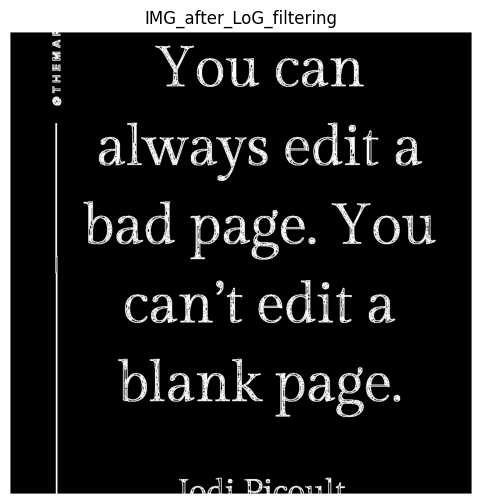

In [108]:
plt.figure(figsize=(6,6))
plt.imshow(IMG_after_LoG_filtering, cmap = "gray")
plt.axis('off')
plt.title("IMG_after_LoG_filtering")
plt.show()

<div><h4>Functions</h4></div>

In [31]:
def do_LoG_filtering(IMG_before_LoG_filtering, filtter_size, standrad_deviation, threshold, channels = False):
    loG_filter = generate_loG_filter (standrad_deviation, filtter_size)
    IMG_after_convolution = do_Convolution_over_IMG(IMG_before_LoG_filtering, loG_filter, channels)
    IMG_after_convolution__zero_crossin = do_zero_crossing (IMG_after_convolution, channels)
    IMG_after_convolution__zero_crossin__thresholding = do_thresholding(IMG_after_convolution__zero_crossin, threshold, channels)
    return IMG_after_convolution__zero_crossin__thresholding

# DONE
def  generate_loG_filter(sigma: float, filtter_size = 3): # 3 is a default value not always
    loG_filter = np.zeros((filtter_size, filtter_size))
    k = filtter_size // 2
    if filtter_size%2 == 1 :       
        for i in range(filtter_size):
            for j in range(filtter_size):
                x = i - k
                y = j - k
                exponent = -(x**2 + y**2) / (2 * sigma**2)
                loG_filter[i, j] = np.exp(exponent) * ((x**2 + y**2 - 2 * sigma**2) /  sigma**4)
    
        total_sum = np.sum(loG_filter)
        loG_filter = loG_filter / total_sum
    
    
    return loG_filter

# DONE
def  do_Convolution_over_IMG(IMG_before_convolution, loG_filter, channels = True):

    IMG_before_convolution = np.array(IMG_before_convolution, dtype=float)
    if channels :
        k = loG_filter.shape[0] // 2
        IMG_after_convolution = np.zeros_like(IMG_before_convolution, dtype=float) #The output
        padded = np.pad(IMG_before_convolution, pad_width=k, mode='constant', constant_values=0) # pad  the image using the 0 padding technique
        for channel in range(3):
            for i in range(IMG_before_convolution.shape[0]):
                for j in range(IMG_before_convolution.shape[1]):
                    region = padded[i:i+loG_filter.shape[0], j:j+loG_filter.shape[1], channel]
                    IMG_after_convolution[i, j, channel] = np.sum(region * loG_filter)
    else :
        h, w = IMG_before_convolution.shape
        k = loG_filter.shape[0] // 2
        IMG_after_convolution = np.zeros_like(IMG_before_convolution, dtype=float) #The output
        padded = np.pad(IMG_before_convolution, pad_width=k, mode='constant', constant_values=0) # pad  the image using the 0 padding technique
        for i in range(h):
            for j in range(w):
                region = padded[i:i+loG_filter.shape[0], j:j+loG_filter.shape[1]]
                IMG_after_convolution[i, j] = np.sum(region * loG_filter)
                
    return IMG_after_convolution



# DONE
def do_zero_crossing (IMG_after_convolution, channels = True):
    IMG_after_zero_crossing = np.zeros_like(IMG_after_convolution)
    IMG_after_convolution = np.pad(IMG_after_convolution, pad_width=1, mode='constant', constant_values=0) # pad  the image using the 0 padding technique
    if channels == True :
        for channel in range(IMG_after_convolution.shape[2]-1):
            if channel == 0 :
                channel += 1
            for i in range(IMG_after_convolution.shape[0]-1):
                if i == 0 :
                    i += 1
                for j in range (IMG_after_convolution.shape[1]-1):    
                    if j == 0 :
                        j += 1
                    if ( IMG_after_convolution[i-1,j,channel] * IMG_after_convolution[i+1,j,channel] > 0 \
                    and IMG_after_convolution[i,j-1,channel] * IMG_after_convolution[i,j+1,channel] > 0 \
                    and IMG_after_convolution[i-1,j-1,channel] * IMG_after_convolution[i+1,j+1,channel] > 0\
                    and IMG_after_convolution[i-1,j+1,channel] * IMG_after_convolution[i+1,j-1,channel] > 0) :
                        IMG_after_zero_crossing[i-1,j-1,channel-1] = 0 
                        
                    else:
                        IMG_after_zero_crossing[i-1,j-1,channel-1] = 255
    else:
        for i in range(IMG_after_convolution.shape[0]-1):
            if i == 0 :
                i += 1
            for j in range (IMG_after_convolution.shape[1]-1):
                if j == 0 :
                    j += 1
                if ( IMG_after_convolution[i-1,j] * IMG_after_convolution[i+1,j] > 0 \
                    and IMG_after_convolution[i,j-1] * IMG_after_convolution[i,j+1] > 0 \
                    and IMG_after_convolution[i-1,j-1] * IMG_after_convolution[i+1,j+1] > 0\
                    and IMG_after_convolution[i-1,j+1] * IMG_after_convolution[i+1,j-1] > 0):
                    IMG_after_zero_crossing[i-1,j-1] = 0                
                else :
                    IMG_after_zero_crossing[i-1,j-1] = 255
    return IMG_after_zero_crossing


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Question 5 : Detect the edges in IMG using canny algorithm  </h3>
</div>

<div><h4>Main</h4></div>

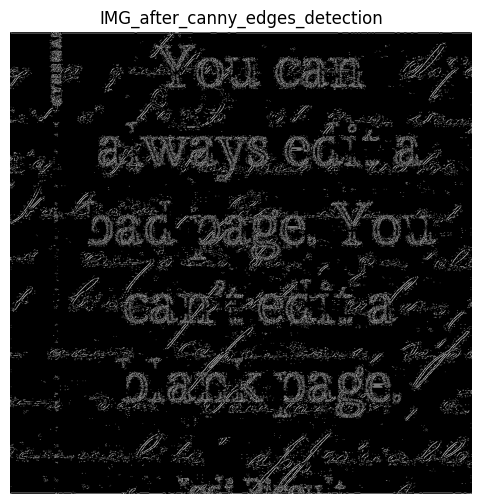

In [39]:
IMG_after_canny_edges_detection = do_canny_edges_detection(IMG_graylevel, channels = False)
plt.figure(figsize=(6,6))
plt.imshow(IMG_after_canny_edges_detection, cmap = "gray")
plt.axis('off')
plt.title("IMG_after_canny_edges_detection")
plt.show()

<div><h4>Functions</h4></div>

In [30]:
def do_canny_edges_detection(IMG_original, sigma__for_gaussian_noise_filter = 1, filter_size__for_gaussian_noise = 5, channels = True):
    IMG_after_removing_G_noise = do_Convolution(IMG_original, generate_gaussian_filter (filter_size__for_gaussian_noise, sigma__for_gaussian_noise_filter), channels)
    
    result_of__apply_sobel_operator = apply_sobel_operator(IMG_after_removing_G_noise)
    gradient_magnitude__IMG_after_removing_G_noise___after_Non_Maximum_Suppression = apply_Non_Maximum_Suppression(result_of__apply_sobel_operator[2],\
                                                                                      do_bining_on_gradient_direction_IMG(get_gradient_direction_IMG(result_of__apply_sobel_operator[0],\
                                                                                                                                                     result_of__apply_sobel_operator[1],channels),\
                                                                                                                          22.5,\
                                                                                                                          67.5,\
                                                                                                                          112.5,\
                                                                                                                          157.5,\
                                                                                                                          channels),\
                                                                                      channels)
    gradient_magnitude__IMG_after_removing_G_noise___after_Non_Maximum_Suppression___after_hysteresis_thresholding = do_hysteresis_thresholding(gradient_magnitude__IMG_after_removing_G_noise___after_Non_Maximum_Suppression,50,150, channels)
    return gradient_magnitude__IMG_after_removing_G_noise___after_Non_Maximum_Suppression___after_hysteresis_thresholding
def do_hysteresis_thresholding (IMG, thresholding_high, thresholding_low, channels = True):
    if channels == True :
        for channel in range(IMG.shape[2]):
            for i in range(IMG.shape[0]):
                for j in range (IMG.shape[1]):
                    if IMG[i,j,channel] <= thresholding_low :
                        IMG[i,j,channel] = 0
                    elif IMG[i,j,channel] >= thresholding_high :
                        IMG[i,j,channel] = 255
                    if IMG[i,j,channel] >= thresholding_low and IMG[i,j,channel] <= thresholding_high :
                        for i in IMG[i-1:i+2,j-1:i+2,channel]:
                            if i >= thresholding_high:
                                IMG[i,j,channel] = 255
                                break
                            else:
                                for i in IMG[i-2:i+3,j-2:i+3,channel]:
                                    if i >= thresholding_high:
                                        IMG[i,j,channel] = 255
                                        break
                                    else:
                                        IMG[i,j,channel] = 0
                                        break
    else:
        for i in range(IMG.shape[0]):
            for j in range (IMG.shape[1]):
                if IMG[i,j] <= thresholding_low :
                    IMG[i,j] = 0
                elif IMG[i,j] >= thresholding_high :
                    IMG[i,j] = 255
                if IMG[i,j] >= thresholding_low and IMG[i,j] <= thresholding_high :
                    for i in IMG[i-1:i+2,j-1:i+2]:
                        if i >= thresholding_high:
                            IMG[i,j] = 255
                            break
                        else:
                            for i in IMG[i-2:i+3,j-2:i+3]:
                                if i >= thresholding_high:
                                    IMG[i,j] = 255
                                    break
                                else:
                                    IMG[i,j] = 0
                                    break
    
    
    
    return IMG



def generate_gaussian_filter (size, sigma):
    k = size // 2
    generated_gaussian_filter = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = i - k
            y = j - k
            exponent = -(x**2 + y**2) / (2 * sigma**2)
            generated_gaussian_filter[i, j] = np.exp(exponent) / (2 * np.pi * sigma**2)

    total_sum = np.sum(generated_gaussian_filter)
    generated_gaussian_filter = generated_gaussian_filter / total_sum
    return generated_gaussian_filter

<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">END</h1>
</div>